In [1]:
import pandas as pd
from mplsoccer import Pitch, FontManager
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patheffects as path_effects
fm = FontManager()
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

In [2]:
df = pd.read_csv('archivos/premierEventos15-16.csv')

<ipython-input-2-276eba623610>:1: DtypeWarning: Columns (10,12,17,18,19,20,23,28,37,45,46,52,73,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('archivos/premierEventos15-16.csv')


In [3]:
df.head()

,Unnamed: 0,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,block_save_block,shot_deflected,player_off_permanent,goalkeeper_success_in_play,shot_follows_dribble,goalkeeper_lost_out,half_start_late_video_start,goalkeeper_lost_in_play,goalkeeper_penalty_saved_to_post,goalkeeper_saved_to_post
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(1313783, 113)

In [5]:
df_mini = df.head(20)

In [6]:
df.type.value_counts()

type
Pass                 368619
Ball Receipt*        340324
Carry                276949
Pressure             115402
Ball Recovery         40943
Duel                  32290
Clearance             21645
Block                 14839
Dribble               13721
Goal Keeper           11777
Miscontrol            10786
Dispossessed          10520
Shot                   9908
Foul Committed         9512
Foul Won               9112
Interception           8920
Dribbled Past          8771
Substitution           2109
Half Start             1520
Half End               1520
Injury Stoppage        1032
Starting XI             760
Tactical Shift          625
50/50                   559
Shield                  503
Referee Ball-Drop       272
Bad Behaviour           193
Error                   178
Player Off              145
Player On               144
Offside                 109
Own Goal Against         38
Own Goal For             38
Name: count, dtype: int64

In [7]:
recuperaciones = df[df['type'] == 'Ball Recovery']

In [8]:
recuperaciones_mini = recuperaciones.head(20)

In [9]:
df_recuperaciones = recuperaciones[['location', 'team']]

In [10]:
df_recuperaciones[['x', 'y']] = df_recuperaciones['location'].str.strip('[').str.strip(']').str.split(',').apply(pd.Series)
df_recuperaciones[['x', 'y']] = df_recuperaciones[['x', 'y']].astype(float)

<ipython-input-10-87b5e0a50d64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recuperaciones[['x', 'y']] = df_recuperaciones['location'].str.strip('[').str.strip(']').str.split(',').apply(pd.Series)
<ipython-input-10-87b5e0a50d64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recuperaciones[['x', 'y']] = df_recuperaciones['location'].str.strip('[').str.strip(']').str.split(',').apply(pd.Series)
<ipython-input-10-87b5e0a50d64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [12]:
df_recuperaciones = df_recuperaciones.reset_index(drop=True)

In [13]:
df_recuperaciones

,location,team,x,y
0,"[21.9, 54.3]",Leicester City,21.9,54.3
1,"[99.1, 76.1]",AFC Bournemouth,99.1,76.1
2,"[5.2, 10.6]",Leicester City,5.2,10.6
3,"[79.4, 45.5]",AFC Bournemouth,79.4,45.5
4,"[18.9, 77.0]",AFC Bournemouth,18.9,77.0
...,...,...,...,...
40938,"[55.8, 68.0]",Chelsea,55.8,68.0
40939,"[44.5, 48.7]",Chelsea,44.5,48.7
40940,"[52.5, 57.4]",Chelsea,52.5,57.4
40941,"[50.7, 58.7]",Chelsea,50.7,58.7


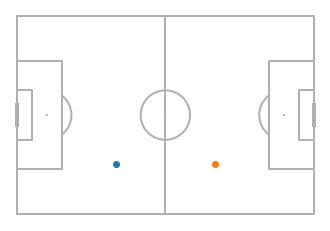

In [16]:
fig, ax = plt.subplots()
pitch = Pitch(pitch_type='statsbomb')
pitch.draw(ax=ax)
pitch.scatter(40, 60,ax=ax)
pitch.scatter(80, 60,ax=ax)


plt.show()

In [17]:
pitch.dim

FixedDims(pitch_width=80.0, pitch_length=120.0, goal_width=8.0, goal_length=2.4, six_yard_width=20.0, six_yard_length=6.0, penalty_area_width=44.0, penalty_area_length=18.0, circle_diameter=20.0, corner_diameter=2.186, arc=53.05, invert_y=True, origin_center=False, left=0.0, right=120.0, bottom=80.0, top=0.0, aspect=1.0, width=80.0, length=120.0, goal_bottom=44.0, goal_top=36.0, six_yard_left=6.0, six_yard_right=114.0, six_yard_bottom=50.0, six_yard_top=30.0, penalty_left=12.0, penalty_right=108.0, penalty_area_left=18.0, penalty_area_right=102.0, penalty_area_bottom=62.0, penalty_area_top=18.0, center_width=40.0, center_length=60.0, x_markings_sorted=array([  0.,   6.,  12.,  18.,  60., 102., 108., 114., 120.]), y_markings_sorted=array([ 0., 18., 30., 36., 44., 50., 62., 80.]), pitch_extent=array([  0., 120.,   0.,  80.]), positional_x=array([  0.,  18.,  39.,  60.,  81., 102., 120.]), positional_y=array([ 0., 18., 30., 50., 62., 80.]), stripe_locations=array([  0. ,   6. ,  12. ,  18

In [19]:
df_recuperaciones['Def 3rd'] = df_recuperaciones['x'] < 40
df_recuperaciones['Mid 3rd'] = (df_recuperaciones['x'] >= 40) & (df_recuperaciones['x'] < 80)
df_recuperaciones['Att 3rd'] = df_recuperaciones['x'] >= 80
tercios = ['Def 3rd', 'Mid 3rd', 'Att 3rd']

df_total = pd.DataFrame(df_recuperaciones[tercios].sum())

In [21]:
df_total.columns = ['total']
df_total = df_total.T
df_total = df_total.divide(df_total.sum(axis=1), axis=0) * 100
df_total

,Def 3rd,Mid 3rd,Att 3rd
total,38.480326,38.348436,23.171238


In [28]:
df_equipos = df_recuperaciones.groupby('team').sum()[tercios]
dividir = df_equipos.sum(axis=1)
df_plot = df_equipos.divide(dividir, axis=0) * 100
df_plot

,Def 3rd,Mid 3rd,Att 3rd
team,,,
AFC Bournemouth,39.444995,37.215064,23.339941
Arsenal,39.332366,34.591195,26.076439
Aston Villa,40.189715,39.440839,20.369446
Chelsea,35.924265,40.009965,24.065770
Crystal Palace,37.656904,37.331474,25.011623
Everton,42.414431,35.985199,21.600370
Leicester City,36.529243,38.590604,24.880153
Liverpool,35.168903,40.860713,23.970384
Manchester City,34.104865,37.458668,28.436467


In [32]:
equipos = list(df_recuperaciones.team.sort_values().unique())

In [33]:
equipos

['AFC Bournemouth',
 'Arsenal',
 'Aston Villa',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester United',
 'Newcastle United',
 'Norwich City',
 'Southampton',
 'Stoke City',
 'Sunderland',
 'Swansea City',
 'Tottenham Hotspur',
 'Watford',
 'West Bromwich Albion',
 'West Ham United']

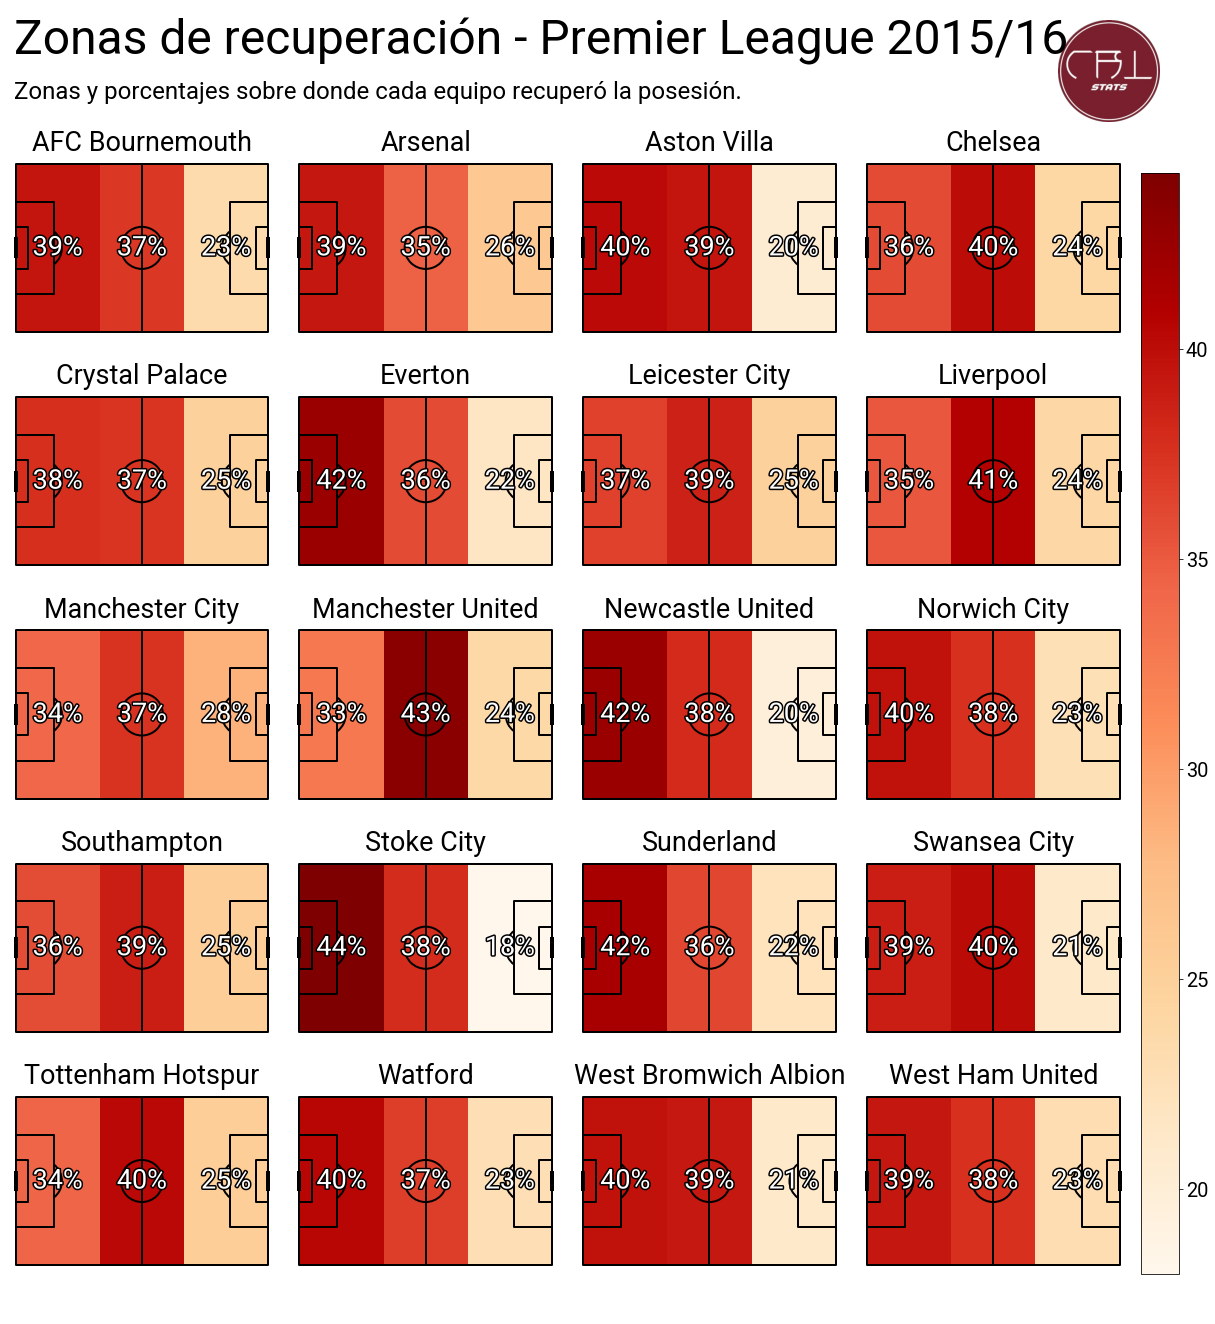

In [35]:
# setup a mplsoccer pitch
pitch = Pitch(line_zorder=2, line_color='black', pad_top=20, pitch_type='statsbomb')

# mplsoccer calculates the binned statistics usually from raw locations, such as pressure events
# for this example we will create a binned statistic dividing
# the pitch into thirds for one point (0, 0)
# we will fill this in a loop later with each team's statistics from the dataframe
bin_statistic = pitch.bin_statistic([0], [0], statistic='count', bins=(3, 1))

GRID_HEIGHT = 0.8
CBAR_WIDTH = 0.03
fig, axs = pitch.grid(nrows=5, ncols=4, figheight=20,
                      # leaves some space on the right hand side for the colorbar
                      grid_width=0.88, left=0.025,
                      endnote_height=0.03, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_space=0.02, title_height=0.06, grid_height=GRID_HEIGHT)
fig.set_facecolor('white')

#ids_equipos = df_plot['Squad'].values
vmin = df_plot[tercios].min().min()  # we normalise the heatmaps with the min / max values
vmax = df_plot[tercios].max().max()
for i, ax in enumerate(axs['pitch'].flat[:len(equipos)]):
    # the top of the StatsBomb pitch is zero
    # plot the title half way between zero and -20 (the top padding)
    ax.text(60, -10, equipos[i],
            ha='center', va='center', fontsize=27,
            fontproperties=fm.prop)

    # fill in the bin statistics from df_plot and plot the heatmap
    bin_statistic['statistic'] = df_plot.loc[df_plot.index == equipos[i], tercios].values
    heatmap = pitch.heatmap(bin_statistic, ax=ax, cmap='OrRd', vmin=vmin, vmax=vmax)
    annotate = pitch.label_heatmap(bin_statistic, color='white', fontproperties=fm.prop,
                                   path_effects=path_eff, fontsize=27, ax=ax,
                                   str_format='{0:.0f}%', ha='center', va='center')

# if its the Bundesliga remove the two spare pitches
#if len(equipos) == 28:
#    for ax in axs['pitch'][-1, 3:]:
#        ax.remove()

# add cbar axes
cbar_bottom = axs['pitch'][-1, 0].get_position().y0
cbar_left = axs['pitch'][0, -1].get_position().x1 + 0.01
ax_cbar = fig.add_axes((cbar_left, cbar_bottom, CBAR_WIDTH,
                        # take a little bit off the height because of padding
                        GRID_HEIGHT - 0.036))
cbar = plt.colorbar(heatmap, cax=ax_cbar)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(fm.prop)
    label.set_fontsize(20)
ax.set_axis_off()
# -- Final details
logo_ax = fig.add_axes(
    [0.85, 0.87, .08, .08]
)
img = Image.open('/Users/Federico Rábanos/Downloads/rToIfopo_400x400-modified.png')
logo_ax.imshow(img)
logo_ax.axis('off')

fig.text(
    x=0.03, y=.915,
    s='Zonas de recuperación - Premier League 2015/16',
    ha='left',
    va='bottom',
    size=48,
    fontproperties = fm.prop
)
fig.text(
    x=0.03, y=.888,
    s='Zonas y porcentajes sobre donde cada equipo recuperó la posesión.',
    ha='left',
    va='bottom',
    weight='bold',
    size=24,
    fontproperties = fm.prop
)

plt.show()

#plt.savefig('C:/Users/Federico Rábanos/Documents/lanus stats/Hilos/finLpf2022/zonastoques.png', dpi=300, bbox_inches='tight')

In [36]:
df_plot

,Def 3rd,Mid 3rd,Att 3rd
team,,,
AFC Bournemouth,39.444995,37.215064,23.339941
Arsenal,39.332366,34.591195,26.076439
Aston Villa,40.189715,39.440839,20.369446
Chelsea,35.924265,40.009965,24.065770
Crystal Palace,37.656904,37.331474,25.011623
Everton,42.414431,35.985199,21.600370
Leicester City,36.529243,38.590604,24.880153
Liverpool,35.168903,40.860713,23.970384
Manchester City,34.104865,37.458668,28.436467
